In [61]:
###··· TURBINE DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#Load the dataset
turbine_dataset = pd.read_csv("A1-turbine.txt", sep='\t', header=0)
x = turbine_dataset.drop(columns = ['#height_over_sea_level', 'fall', 'net_fall', 'flow']) 
y = turbine_dataset[["power_of_hydroelectrical_turbine"]]
#Scale the data
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True)


Epoch 1/25
12/12 [==============================] - 1s 29ms/step - loss: 0.0506 - mae: 0.1719 - val_loss: 0.0134 - val_mae: 0.0990
Epoch 2/25
12/12 [==============================] - 0s 11ms/step - loss: 0.0067 - mae: 0.0660 - val_loss: 0.0042 - val_mae: 0.0504
Epoch 3/25
12/12 [==============================] - 0s 11ms/step - loss: 0.0024 - mae: 0.0382 - val_loss: 6.6826e-04 - val_mae: 0.0215
Epoch 4/25
12/12 [==============================] - 0s 11ms/step - loss: 9.5916e-04 - mae: 0.0256 - val_loss: 6.9696e-04 - val_mae: 0.0242
Epoch 5/25
12/12 [==============================] - 0s 12ms/step - loss: 2.9448e-04 - mae: 0.0134 - val_loss: 1.6540e-04 - val_mae: 0.0098
Epoch 6/25
12/12 [==============================] - 0s 12ms/step - loss: 7.5483e-05 - mae: 0.0059 - val_loss: 5.5029e-05 - val_mae: 0.0054
Epoch 7/25
12/12 [==============================] - 0s 12ms/step - loss: 2.7916e-05 - mae: 0.0035 - val_loss: 1.9883e-05 - val_mae: 0.0032
Epoch 8/25
12/12 [=============================

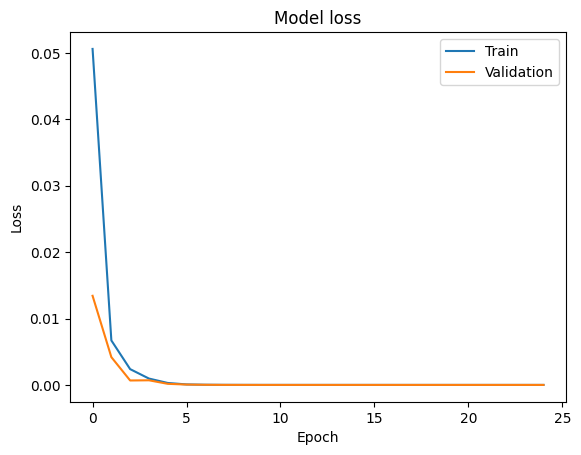

In [62]:
# Part 2: Implementation of NN
import tensorflow as tf
from matplotlib import pyplot as plt


model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1])),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])
sgd = tf.keras.optimizers.Adam(learning_rate=0.08, ema_momentum=0.01)
model.compile(loss='mse', metrics=['mae'],optimizer=sgd)
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


12/12 [==============================] - 0s 2ms/step

R2 Score:  0.9999999737133172
MSE:  1.4872642011934748e-09
MAE:  3.1827833251946e-05

R2 Score:  0.999998965057123
MSE:  6.596751383419396e-08
MAE:  5.5280591810719685e-05

MAPE:  0.000301180155243575


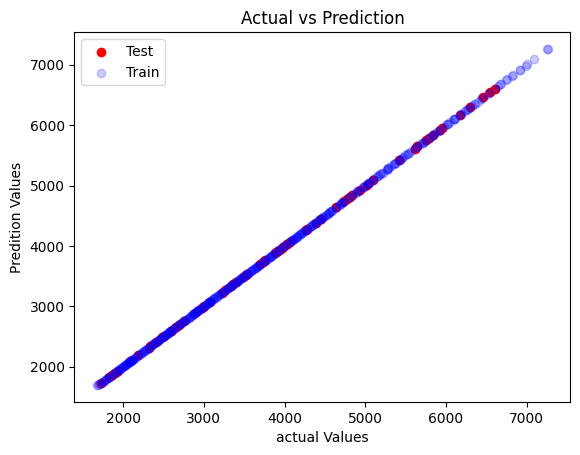

In [63]:
from sklearn.metrics import *
from matplotlib import pyplot as plt


# Part 3: Obtaining predictions
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print("")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test = scaler.inverse_transform(y_test)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_train = scaler.inverse_transform(y_train)
y_pred_train = scaler.inverse_transform(y_pred_train)

plt.scatter(y_test, y_pred_test, color="red", label="Test")
plt.scatter(y_train, y_pred_train, color="blue", alpha=0.2, label="Train")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")


plt.legend()
plt.show()
